# Análisis de Sismos en Ecuador Cátalogo

# Import

In [ ]:
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

import folium as fl
from folium.plugins import MiniMap
from folium.plugins  import FloatImage

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster  import KMeans
#%matplolib inline

import warnings

# Suprime todas las advertencias (no recomendado a menos que estés seguro)
warnings.filterwarnings('ignore')

#from sklearn.preprocessing import standardscaler

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
# ###################################################
# INSTITUTO GEOFÍSICO -ESCUELA POLITÉCNICA NACIONAL #
#                                                   #
#
# IG-EPN Catálogo Sísmico Instrumental del Ecuador
# Copyright (C) Instituto Geofísico - Escuela Politécnica Nacional
# Quito - Ecuador
# https://www.igepn.edu.ec/
# Fecha de generación: 05-May-2023
#
# Estos datos corresponden a los eventos sismicos de origen tectonico con una magnitud desde 3.5 registrados y localizados en el territorio continental
# El tiempo de origen del evento: tiempo y tiempo_ms (milisegundos) está en tiempo universal. Para convertir a tiempo local se deben restar 5 horas
# Contiene ademas, metainformacion sobre la calidad y la incertidumbre o errores de la localizacion de los eventos sismicos
#
# event            :   código del evento sísmico
# orig_id          :   identificados para relacionarlo con los picks y magnitudes
# time_value       :   tiempo de ocurrencia del evento
# time_value_ms    :   milisegundos que se debe añadir para tener el tiempo precisio
# latitude_value   :   latitud
# longitude_value  :   longitud
# depth_value      :   profundidad
#
# Magnitud
# Este evento se muestra con dos tipos de magnitudes. La magnitud media y magnitud principal.
# magnitude_value_M      : es la magnitud promedio de las diferentes magnitudes calculadas
# magnitude_value_P      : magnitud preferida, normalmente depende del tamaño del evento
# magnitude_type_P       : tipo de magnitud correspondiente a la magnitud preferida
# magnitudeP_stationCount: número de estaciones usadas en el cálculo de la magnitud preferida
#
# Calidad de la localizacion
# La calidad se expresa con varios atributos, los comunmente utilizados son: errores, cobertura azimutal, estaciones usadas
# para la ubicación del evento, distancias de las estaciones al evento, etc. Estos parametros son:
# quality_associatedPhaseCount  : número de fases (ondas P y S) que se observan para el evento
# quality_usedPhaseCount        : número de fases usadas en la localización del evento
# quality_associatedStationCount: numero de estaciones en las que se registro el evento
# quality_usedStationCount      : número de estaciones usadas en la localización del evento
# quality_standardError         : error en del tiempo de origen
# quality_azimuthalGap          : máximo ángulo consecutivo entre las estaciones que registraron el evento  (*que se usaron para localizar el evento)
# quality_maximumDistance       : máxima distancia al epicentro de todas las estaciones que registraron el evento
# quality_minimumDistance       : mínima distancia al epicentro de todos las estaciones que registraron el evento
# quality_medianDistance        : distancia promedio al epicentro de todas las estaciones que registraron el evento
#
# Incertidumbres en los principales parámetros del evento sísmico
# Las incertidumbres se expresan en la ubicacion, profundidad y magnitud. La incertidumbre se puede describir como una simple
# incertidumbre horizontal circular, una elipse de incertidumbre según IMS1.0 o un elipsoide de confianza.
# time_uncertainty       :   incertidumbre en el tiempo
# latitude_uncertainty   :   incertidumbre en latitud
# longitude_uncertainty  :   incertidumbre en longitud
# depth_uncertainty      :   incertidumbre en profundidad
# magnitudeP_uncertainty :   incertidumbre en la magnitud
#
#

# 1. Lectura del conjunto de datos

In [ ]:
#df= pd.read_csv("Sismo_original.csv", sep=';')

#df= pd.read_csv("D:/2023_TFM/Dataset/Sismo_original.csv", sep=';')
df= pd.read_csv("datos_sismos.csv", sep=';')

# 2. Visualización del conjunto de datos

In [ ]:
# Dimensiones del dataset
df.shape


(2983, 26)

In [ ]:
df.head(10)

,event,orig_id,time_value,time_value_ms,time_uncertainty,latitude_value,latitude_uncertainty,longitude_value,longitude_uncertainty,depth_value,...,quality_associatedPhaseCount,quality_usedPhaseCount,quality_associatedStationCount,quality_usedStationCount,quality_standardError,quality_azimuthalGap,quality_maximumDistance,quality_minimumDistance,quality_medianDistance,Unnamed: 25
0,igepn2012acvi,2610,2012-01-02 13:02:44.000,102854,1.322,-1.519048,9.36,-80.999382,10.05,10.00,...,16,13,15,13,0.80,311.15,377.37,210.01,287.76,IGEPN
1,igepn2012acxo,2611,2012-01-02 14:10:00.000,507680,0.740,-1.291955,6.01,-80.529152,4.74,12.00,...,34,25,31,23,0.85,233.55,319.54,44.93,237.95,IGEPN
2,igepn2012ahkn,2643,2012-01-05 01:18:17.000,293170,1.268,-1.822281,11.44,-81.669304,9.91,5.00,...,15,15,14,14,1.35,322.97,458.75,285.82,376.04,IGEPN
3,igepn2012ahzg,2647,2012-01-05 08:43:48.000,885316,1.454,-1.651550,10.68,-81.512100,9.98,10.00,...,22,20,21,19,0.88,320.57,441.64,260.26,353.72,IGEPN
4,igepn2012aigm,2649,2012-01-05 12:22:12.000,310021,0.415,0.886300,3.04,-78.776039,1.81,1.17,...,36,30,28,24,0.78,175.91,265.47,47.15,153.12,IGEPN
5,igepn2012ajib,2651,2012-01-06 02:16:44.000,929684,1.041,-1.675611,13.42,-81.597900,7.58,10.00,...,16,14,14,12,0.45,334.43,392.87,328.99,351.19,IGEPN
6,igepn2012akby,2660,2012-01-06 12:20:20.000,455264,0.655,-0.787565,2.94,-79.611374,6.33,12.83,...,31,31,29,29,0.66,221.68,214.00,81.08,145.52,IGEPN
7,igepn2012aohm,2691,2012-01-08 19:40:29.000,873804,0.898,-1.817206,8.40,-76.259605,11.93,31.16,...,19,17,17,16,0.56,332.22,277.43,242.04,259.74,IGEPN
8,igepn2012arvk,2715,2012-01-10 18:07:09.000,70425,0.223,-0.832822,2.01,-80.450470,1.83,4.85,...,64,58,57,54,1.22,87.07,4523.70,33.70,257.58,IGEPN
9,igepn2012asax,2718,2012-01-10 20:54:32.000,297652,0.552,0.108969,2.64,-77.422020,3.65,5.15,...,43,39,34,31,0.37,236.85,212.97,35.04,136.07,IGEPN


Exploración de los Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   event                           2983 non-null   object 
 1    orig_id                        2983 non-null   int64  
 2    time_value                     2983 non-null   object 
 3    time_value_ms                  2983 non-null   int64  
 4    time_uncertainty               2983 non-null   object 
 5    latitude_value                 2983 non-null   float64
 6    latitude_uncertainty           2983 non-null   float64
 7    longitude_value                2983 non-null   float64
 8    longitude_uncertainty          2983 non-null   float64
 9    depth_value                    2983 non-null   float64
 10  depth_uncertainty               2983 non-null   object 
 11   magnitude_value_M              2983 non-null   float64
 12   magnitude_value_P              29

In [ ]:
df.describe()

,orig_id,time_value_ms,latitude_value,latitude_uncertainty,longitude_value,longitude_uncertainty,depth_value,magnitude_value_M,magnitude_value_P,magnitudeP_stationCount,quality_associatedPhaseCount,quality_usedPhaseCount,quality_usedStationCount,quality_standardError,quality_azimuthalGap,quality_maximumDistance,quality_minimumDistance,quality_medianDistance
count,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000,2983.000000
mean,117044.081462,496340.145826,-1.292765,4.209504,-79.927497,5.895059,25.170540,4.035334,4.005096,19.260141,53.610459,44.791820,39.922561,0.824361,198.385491,375.009980,74.297496,251.606634
std,84079.078498,292479.988243,1.520093,4.962078,1.642650,6.066559,42.380412,0.510591,0.503796,11.381356,29.255709,26.201073,23.597999,0.624366,77.358081,197.360193,83.219682,499.525667
min,2610.000000,318.000000,-5.856019,0.270000,-92.323769,0.230000,-2.040000,3.100000,3.500000,1.000000,4.000000,4.000000,2.000000,0.000000,21.690000,2.460000,0.940000,2.040000
25%,60283.000000,246391.000000,-2.445555,2.050000,-80.792625,2.665000,5.365000,3.700000,3.600000,10.000000,32.000000,25.000000,22.000000,0.640000,139.340000,283.990000,29.915000,176.375000
50%,99833.000000,496775.000000,-1.301829,2.970000,-80.134041,4.250000,10.000000,3.900000,3.800000,18.000000,50.000000,41.000000,36.000000,0.800000,211.930000,353.220000,52.530000,229.510000
75%,173841.000000,754260.500000,-0.087578,4.770000,-79.110756,6.870000,19.810000,4.200000,4.200000,26.000000,72.000000,61.000000,55.000000,0.950000,255.990000,429.205000,88.420000,280.780000
max,614985.000000,999912.000000,1.958341,121.330000,-75.377686,106.400000,750.000000,7.600000,7.600000,77.000000,194.000000,187.000000,162.000000,29.830000,354.860000,4523.700000,1572.210000,22644.000000


Verificación de la calidad de los datos

In [ ]:
df = df.dropna()
df.shape

(2983, 26)

In [ ]:
#Error de escritura de los espacios en blanco en el nombre de los atributos del dataset

In [ ]:
df.rename(columns={' magnitude_value_M': 'magnitude_value_M'}, inplace=True)
df.rename(columns={' orig_id': 'orig_id'}, inplace=True)
df.rename(columns={' time_value': 'time_value'}, inplace=True)
df.rename(columns={' time_value_ms': 'time_value_ms'}, inplace=True)
df.rename(columns={' time_uncertainty': 'time_uncertainty'}, inplace=True)
df.rename(columns={' latitude_value': 'latitude_value'}, inplace=True)
df.rename(columns={' latitude_uncertainty': 'latitude_uncertainty'}, inplace=True)
df.rename(columns={' longitude_value': 'longitude_value'}, inplace=True)
df.rename(columns={' longitude_uncertainty': 'longitude_uncertainty'}, inplace=True)
df.rename(columns={' depth_value': 'depth_value'}, inplace=True)
df.rename(columns={' magnitude_value_M': 'magnitude_value_M'}, inplace=True)
df.rename(columns={' magnitude_value_P': 'magnitude_value_P'}, inplace=True)
df.rename(columns={' magnitudeP_uncertainty': 'magnitudeP_uncertainty'}, inplace=True)
df.rename(columns={' magnitudeP_stationCount': 'magnitudeP_stationCount'}, inplace=True)

In [ ]:
#Transformar las columna tipo object
numeric_columns = ['magnitudeP_uncertainty',
                   'quality_associatedStationCount',
                   'depth_uncertainty',
                   'time_uncertainty',
                   'latitude_value',
                   'quality_associatedStationCount']

print(numeric_columns)


['magnitudeP_uncertainty', 'quality_associatedStationCount', 'depth_uncertainty', 'time_uncertainty', 'latitude_value', 'quality_associatedStationCount']


In [ ]:
#Convertir las columnas tipo object
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filtrar y mostrar los valores NaN en el DataFrame
nan_values = df[df.isna()]

In [ ]:
#Verificar los tipos de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   event                           2983 non-null   object 
 1   orig_id                         2983 non-null   int64  
 2   time_value                      2983 non-null   object 
 3   time_value_ms                   2983 non-null   int64  
 4   time_uncertainty                2966 non-null   float64
 5   latitude_value                  2983 non-null   float64
 6   latitude_uncertainty            2983 non-null   float64
 7   longitude_value                 2983 non-null   float64
 8   longitude_uncertainty           2983 non-null   float64
 9   depth_value                     2983 non-null   float64
 10  depth_uncertainty               2982 non-null   float64
 11  magnitude_value_M               2983 non-null   float64
 12  magnitude_value_P               29

In [ ]:
#Verificar si existen valores nulos o NAN
df.isna().any()


event                             False
orig_id                           False
time_value                        False
time_value_ms                     False
time_uncertainty                   True
latitude_value                    False
latitude_uncertainty              False
longitude_value                   False
longitude_uncertainty             False
depth_value                       False
depth_uncertainty                  True
magnitude_value_M                 False
magnitude_value_P                 False
magnitude_type_P                  False
magnitudeP_uncertainty             True
magnitudeP_stationCount           False
quality_associatedPhaseCount      False
quality_usedPhaseCount            False
quality_associatedStationCount     True
quality_usedStationCount          False
quality_standardError             False
quality_azimuthalGap              False
quality_maximumDistance           False
quality_minimumDistance           False
quality_medianDistance            False


<AxesSubplot:>

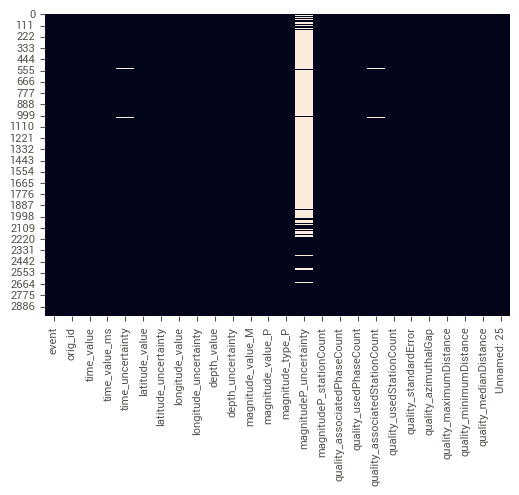

In [ ]:
#Mapa de calor para verificar si existen valores nulos
sns.heatmap(df.isnull(), cbar=False)

Visualizacion de valores atípicos

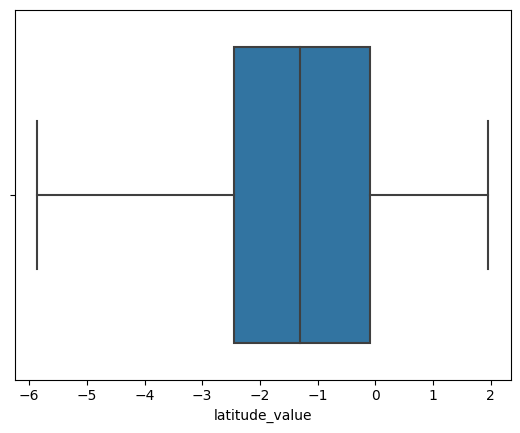

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de caja para una columna específica
sns.boxplot(x=df['latitude_value'])
plt.show()

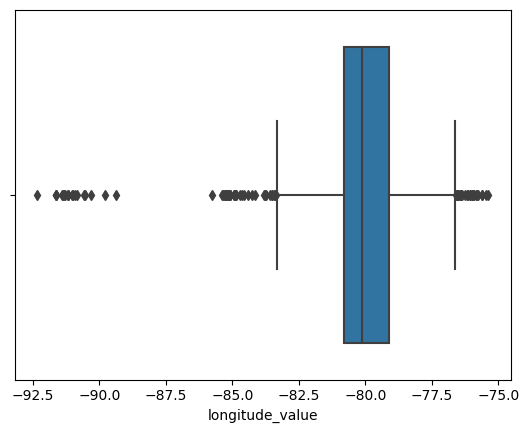

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de caja para una columna específica
sns.boxplot(x=df['longitude_value'])
plt.show()

In [ ]:
descripcion_longitud = df["longitude_value"].describe()
print(descripcion_longitud)

count    2983.000000
mean      -79.927497
std         1.642650
min       -92.323769
25%       -80.792625
50%       -80.134041
75%       -79.110756
max       -75.377686
Name: longitude_value, dtype: float64


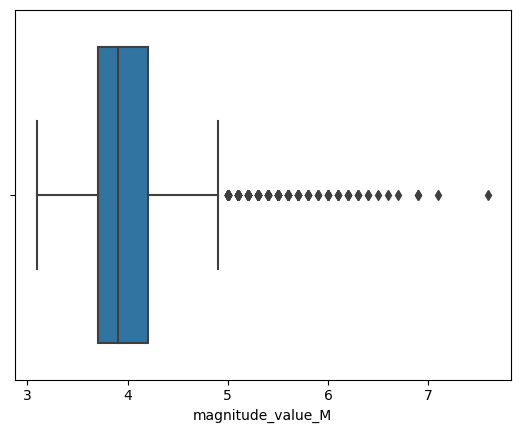

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de caja para una columna específica
sns.boxplot(x=df['magnitude_value_M'])
plt.show()

In [ ]:
descripcion_magnitud = df["magnitude_value_M"].describe()
print(descripcion_magnitud)

count    2983.000000
mean        4.035334
std         0.510591
min         3.100000
25%         3.700000
50%         3.900000
75%         4.200000
max         7.600000
Name: magnitude_value_M, dtype: float64


Limpienza de los datos

In [ ]:
#Eliminar las columas con valores nulos
#Eliminar las columnas

df.drop(["magnitudeP_uncertainty"], axis=1, inplace=True)


In [ ]:

df.drop(["depth_uncertainty"], axis=1, inplace=True)


In [ ]:

df.drop(["time_uncertainty"], axis=1, inplace=True)


In [ ]:
df.drop(["quality_associatedStationCount"], axis=1, inplace=True)


In [ ]:
df.drop(["Unnamed: 25"], axis=1, inplace=True)

In [ ]:
#Verificar si existen valores nulos o NAN
df.isna().any()


event                           False
orig_id                         False
time_value                      False
time_value_ms                   False
latitude_value                  False
latitude_uncertainty            False
longitude_value                 False
longitude_uncertainty           False
depth_value                     False
magnitude_value_M               False
magnitude_value_P               False
magnitude_type_P                False
magnitudeP_stationCount         False
quality_associatedPhaseCount    False
quality_usedPhaseCount          False
quality_usedStationCount        False
quality_standardError           False
quality_azimuthalGap            False
quality_maximumDistance         False
quality_minimumDistance         False
quality_medianDistance          False
dtype: bool

In [ ]:

tiene_nan = df.isna()

NameError: ignored

In [ ]:
numero_de_nan = df.isna().sum().sum()  # Contar todos los NaN en el DataFrame
print("Número total de NaN:", numero_de_nan)


Número total de NaN: 35


In [ ]:
#!pip install missingno
import missingno as msno
msno.matrix(df)

ModuleNotFoundError: No module named 'missingno'

Describe la estadística de los datos


In [ ]:
df.describe().all()

orig_id                            True
time_value_ms                      True
time_uncertainty                   True
latitude_value                     True
latitude_uncertainty               True
longitude_value                    True
longitude_uncertainty              True
depth_value                        True
depth_uncertainty                 False
magnitude_value_M                  True
magnitude_value_P                  True
magnitudeP_stationCount            True
quality_associatedPhaseCount       True
quality_usedPhaseCount             True
quality_associatedStationCount     True
quality_usedStationCount           True
quality_standardError             False
quality_azimuthalGap               True
quality_maximumDistance            True
quality_minimumDistance            True
quality_medianDistance             True
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   event                           2983 non-null   object 
 1   orig_id                         2983 non-null   int64  
 2   time_value                      2983 non-null   object 
 3   time_value_ms                   2983 non-null   int64  
 4   time_uncertainty                2966 non-null   float64
 5   latitude_value                  2983 non-null   float64
 6   latitude_uncertainty            2983 non-null   float64
 7   longitude_value                 2983 non-null   float64
 8   longitude_uncertainty           2983 non-null   float64
 9   depth_value                     2983 non-null   float64
 10  depth_uncertainty               2982 non-null   float64
 11  magnitude_value_M               2983 non-null   float64
 12  magnitude_value_P               29

Latitud

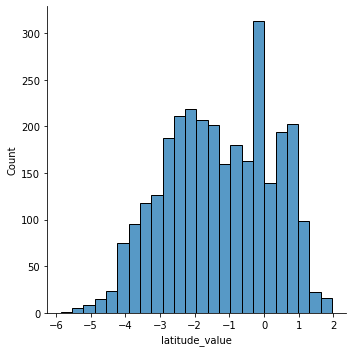

In [ ]:
sns.displot(df["latitude_value"])

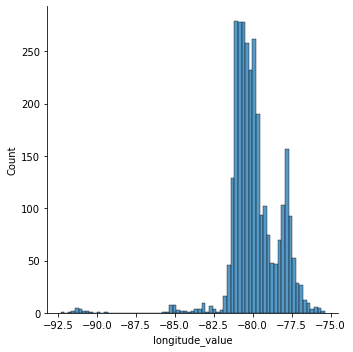

In [ ]:
sns.displot(df["longitude_value"])

Longitud

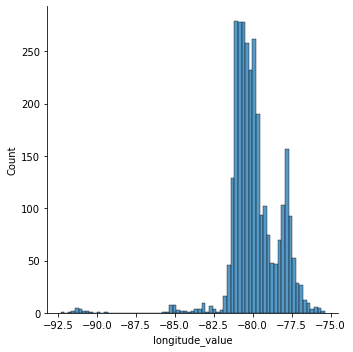

In [ ]:
sns.displot(df["longitude_value"])

In [ ]:
df['longitude_value'].describe()

count    2983.000000
mean      -79.927497
std         1.642650
min       -92.323769
25%       -80.792625
50%       -80.134041
75%       -79.110756
max       -75.377686
Name: longitude_value, dtype: float64

Magnitud

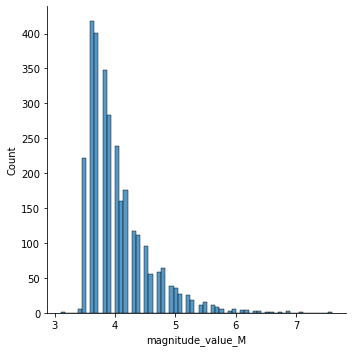

In [ ]:
sns.displot(df["magnitude_value_M"])

In [ ]:
df['magnitude_value_M'].describe()

count    2983.000000
mean        4.035334
std         0.510591
min         3.100000
25%         3.700000
50%         3.900000
75%         4.200000
max         7.600000
Name: magnitude_value_M, dtype: float64

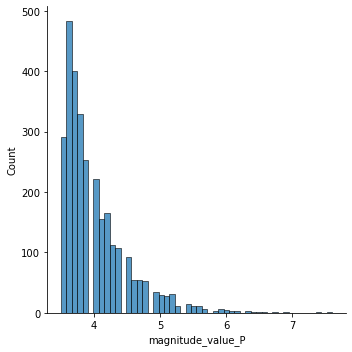

In [ ]:
sns.displot(df["magnitude_value_P"])

In [ ]:
df['magnitude_value_P'].describe()

count    2983.000000
mean        4.005096
std         0.503796
min         3.500000
25%         3.600000
50%         3.800000
75%         4.200000
max         7.600000
Name: magnitude_value_P, dtype: float64

Profundidad

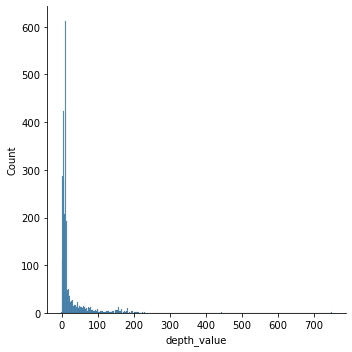

In [ ]:
sns.displot(df["depth_value"])

In [ ]:
df['depth_value'].describe()

count    2983.000000
mean       25.170540
std        42.380412
min        -2.040000
25%         5.365000
50%        10.000000
75%        19.810000
max       750.000000
Name: depth_value, dtype: float64

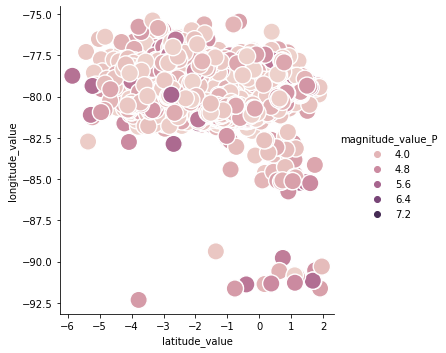

In [ ]:
sns.relplot(data=df,
           x="latitude_value",
           y="longitude_value",
           hue="magnitude_value_P",
           s=300)


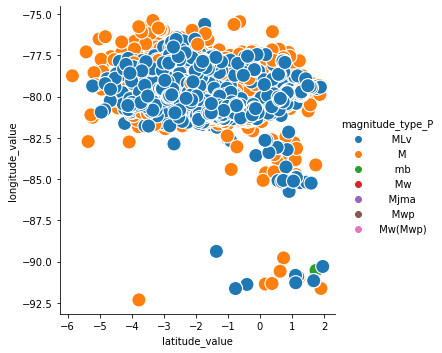

In [ ]:
sns.relplot(data=df,
           x="latitude_value",
           y="longitude_value",
           hue="magnitude_type_P",
           s=200)

In [ ]:
df["magnitude_value_M"].value_counts()


3.6    418
3.7    401
3.8    348
3.9    284
4.0    239
3.5    222
4.2    176
4.1    160
4.3    117
4.4    111
4.5     96
4.8     64
4.7     58
4.6     56
4.9     38
5.0     35
5.1     27
5.2     26
5.3     19
5.5     16
5.6     12
5.4     12
5.7      8
3.4      6
6.0      5
5.8      5
6.1      4
6.2      4
5.9      3
6.3      3
6.4      2
6.9      2
7.6      1
6.7      1
3.1      1
6.5      1
7.1      1
6.6      1
Name: magnitude_value_M, dtype: int64

<AxesSubplot:>

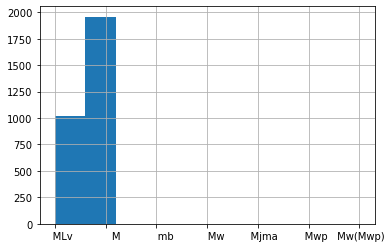

In [ ]:
# Mostrar los valores de la característica como un histograma
%matplotlib inline
import matplotlib.pyplot as plt
df["magnitude_type_P"].hist()


<AxesSubplot:>

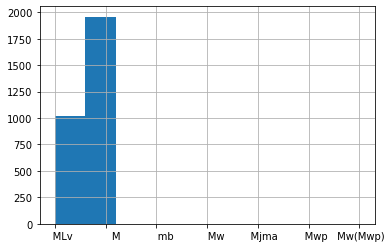

In [ ]:
# Mostrar los valores de la característica como un histograma
%matplotlib inline
import matplotlib.pyplot as plt
df["magnitude_type_P"].hist()


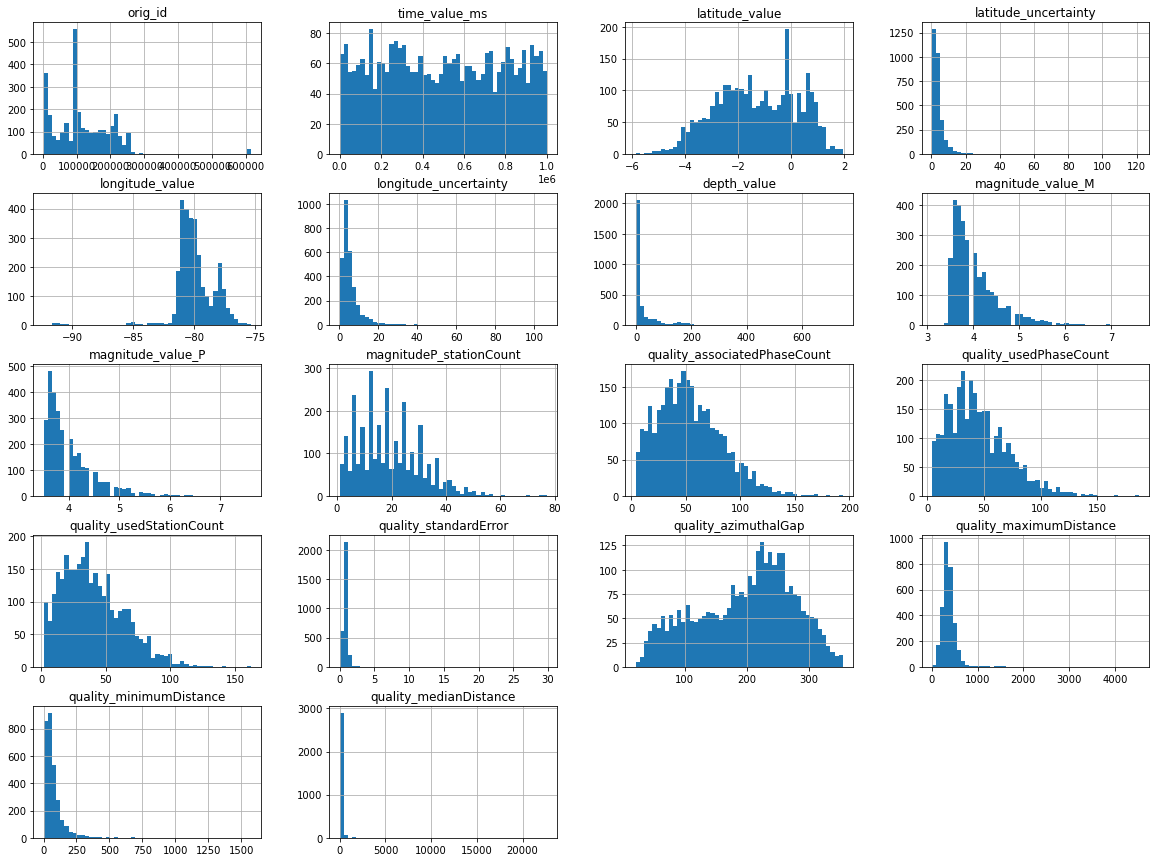

In [ ]:
# Representar gráficamente la distribución de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Reporte de metadatos
import warnings
import sweetviz as sw

warnings.filterwarnings('ignore')

reporte_completo = sw.analyze(df)
reporte_completo.show_html(filepath='reporte_metadatos.html',
            open_browser=True,
            layout='vertical',
            scale=None)


                                             |          | [  0%]   00:00 -> (? left)

Report reporte_metadatos.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   event                         2983 non-null   object 
 1   orig_id                       2983 non-null   int64  
 2   time_value                    2983 non-null   object 
 3   time_value_ms                 2983 non-null   int64  
 4   latitude_value                2983 non-null   float64
 5   latitude_uncertainty          2983 non-null   float64
 6   longitude_value               2983 non-null   float64
 7   longitude_uncertainty         2983 non-null   float64
 8   depth_value                   2983 non-null   float64
 9   magnitude_value_M             2983 non-null   float64
 10  magnitude_value_P             2983 non-null   float64
 11  magnitude_type_P              2983 non-null   object 
 12  magnitudeP_stationCount       2983 non-null   int64  
 13  qua

In [ ]:
df.head()

,event,orig_id,time_value,time_value_ms,latitude_value,latitude_uncertainty,longitude_value,longitude_uncertainty,depth_value,magnitude_value_M,...,magnitude_type_P,magnitudeP_stationCount,quality_associatedPhaseCount,quality_usedPhaseCount,quality_usedStationCount,quality_standardError,quality_azimuthalGap,quality_maximumDistance,quality_minimumDistance,quality_medianDistance
0,igepn2012acvi,2610,2012-01-02 13:02:44.000,102854,-1.519048,9.36,-80.999382,10.05,10.00,3.8,...,MLv,9,16,13,13,0.80,311.15,377.37,210.01,287.76
1,igepn2012acxo,2611,2012-01-02 14:10:00.000,507680,-1.291955,6.01,-80.529152,4.74,12.00,3.8,...,MLv,30,34,25,23,0.85,233.55,319.54,44.93,237.95
2,igepn2012ahkn,2643,2012-01-05 01:18:17.000,293170,-1.822281,11.44,-81.669304,9.91,5.00,3.8,...,MLv,14,15,15,14,1.35,322.97,458.75,285.82,376.04
3,igepn2012ahzg,2647,2012-01-05 08:43:48.000,885316,-1.651550,10.68,-81.512100,9.98,10.00,3.9,...,MLv,21,22,20,19,0.88,320.57,441.64,260.26,353.72
4,igepn2012aigm,2649,2012-01-05 12:22:12.000,310021,0.886300,3.04,-78.776039,1.81,1.17,3.5,...,M,11,36,30,24,0.78,175.91,265.47,47.15,153.12


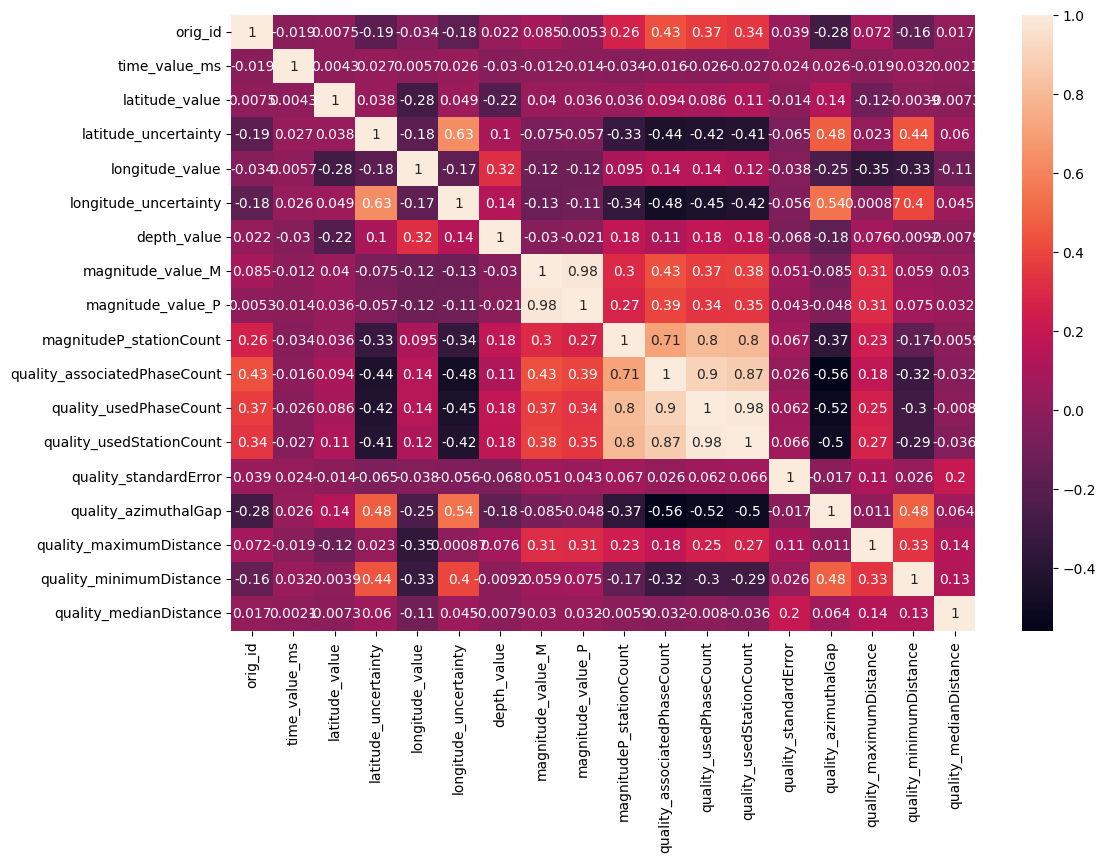

In [ ]:
# Elimina columnas no numéricas antes de calcular la correlación
df_numeric = df.select_dtypes(include=['number'])
corr = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
df_numeric = df.select_dtypes(include=['number'])
correlations = df_numeric.corr()


<AxesSubplot:>

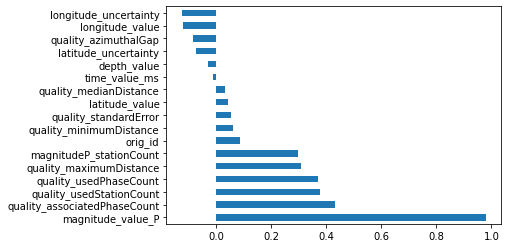

In [ ]:
(correlations
     .magnitude_value_M
     .drop('magnitude_value_M') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

<AxesSubplot:>

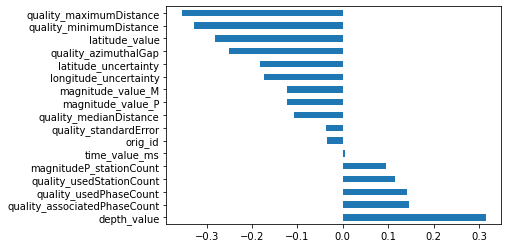

In [ ]:
(correlations
     .longitude_value
     .drop('longitude_value') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

<AxesSubplot:>

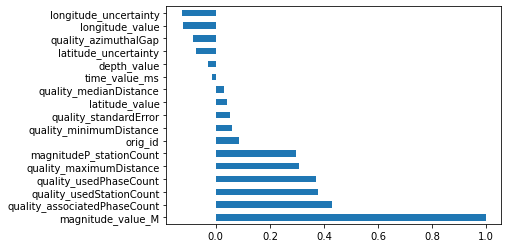

In [ ]:
#Agregado
(correlations
     .magnitude_value_M
     .drop('magnitude_value_P') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

<AxesSubplot:>

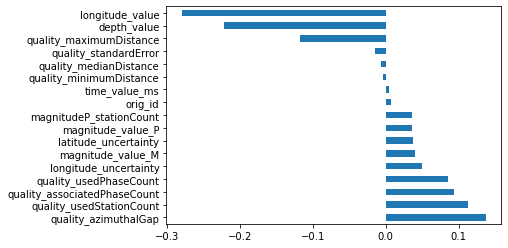

In [ ]:
(correlations
     .latitude_value
     .drop('latitude_value') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh())

In [ ]:
#Seleccion de caracteristicas
features= ['quality_azimuthalGap','magnitude_value_M','latitude_value','longitude_value','magnitude_value_P','quality_maximumDistance', 'quality_usedPhaseCount', 'quality_usedStationCount', 'quality_associatedPhaseCount']

In [ ]:
df_features= df[features]

In [ ]:

X_m= df_features[['latitude_value','magnitude_value_P','quality_maximumDistance', 'quality_usedPhaseCount', 'quality_usedStationCount', 'quality_associatedPhaseCount']]
X_la= df_features[['magnitude_value_M','quality_azimuthalGap', 'quality_usedPhaseCount', 'quality_usedStationCount', 'quality_associatedPhaseCount']]
X_lo= df_features[['latitude_value','magnitude_value_M','magnitude_value_P','quality_maximumDistance', 'quality_usedPhaseCount', 'quality_usedStationCount', 'quality_associatedPhaseCount']]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2983 entries, 0 to 2982
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   event                         2983 non-null   object 
 1   orig_id                       2983 non-null   int64  
 2   time_value                    2983 non-null   object 
 3   time_value_ms                 2983 non-null   int64  
 4   latitude_value                2983 non-null   float64
 5   latitude_uncertainty          2983 non-null   float64
 6   longitude_value               2983 non-null   float64
 7   longitude_uncertainty         2983 non-null   float64
 8   depth_value                   2983 non-null   float64
 9   magnitude_value_M             2983 non-null   float64
 10  magnitude_value_P             2983 non-null   float64
 11  magnitude_type_P              2983 non-null   object 
 12  magnitudeP_stationCount       2983 non-null   int64  
 13  qua

## Regresion lineal

In [ ]:
# Supongamos que X_pca es la matriz de componentes principales
# Y son las variables de destino (latitud y longitud)
Y_m = df_features[['magnitude_value_M']]
Y_la = df_features[['latitude_value']]
Y_lo = df_features[['longitude_value']]


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=42)

# Crea un modelo de regresión lineal
regression_model = LinearRegression()

# Entrena el modelo en los datos de entrenamiento
regression_model.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
Y_pred = regression_model.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 0.011023805881565249
RMSE: 0.10499431356776065
R2 Score: 0.9526918482929646


In [ ]:
# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_la, Y_la, test_size=0.2, random_state=42)

# Crea un modelo de regresión lineal
regression_model = LinearRegression()

# Entrena el modelo en los datos de entrenamiento
regression_model.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
Y_pred = regression_model.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 2.1816850735597977
RMSE: 1.4770528337062956
R2 Score: 0.06638101993048606


In [ ]:
# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_lo, Y_lo, test_size=0.2, random_state=42)

# Crea un modelo de regresión lineal
regression_model = LinearRegression()

# Entrena el modelo en los datos de entrenamiento
regression_model.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
Y_pred = regression_model.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 1.5813743848048756
RMSE: 1.2575270910818883
R2 Score: 0.388130538563608


# RandomForestRegressor



In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:

# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=42)
Y_train = np.ravel(Y_train)
# Crea un modelo de regresión lineal
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros

# Entrena el modelo en los datos de entrenamiento
rf_regressor.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
Y_pred = rf_regressor.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 0.012729045226130631
RMSE: 0.11282307045161744
R2 Score: 0.9453738927269646


## Optimización de hiperparámetros

In [ ]:

from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # Número de pliegues de validación cruzada
    scoring='neg_mean_squared_error',  # Métrica a optimizar
    n_jobs=-1  # Utilizar todos los núcleos de CPU disponibles
)

# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener el mejor modelo con los hiperparámetros óptimos
best_rf_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
Y_pred = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
MSE: 0.012469372173653553
RMSE: 0.11166634306564155
R2 Score: 0.9464882675892213


In [ ]:
# Asegúrate de que Y_pred y Y_test sean vectores unidimensionales
Y_pred = np.reshape(Y_pred, (-1,))
Y_test = np.reshape(Y_test, (-1,))

# Crea un DataFrame con las predicciones, las magnitudes y las coordenadas reales
predictions_df = pd.DataFrame({'Pred_m': Y_pred,
                               'Real_m': Y_test
                              })

In [ ]:
# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_la, Y_la, test_size=0.2, random_state=42)
Y_train = np.ravel(Y_train)
# Crea un modelo de regresión lineal
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros

# Entrena el modelo en los datos de entrenamiento
rf_regressor.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
Y_pred = rf_regressor.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 2.0787902839892043
RMSE: 1.441801055620783
R2 Score: 0.11041328180805332


In [ ]:

from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # Número de pliegues de validación cruzada
    scoring='neg_mean_squared_error',  # Métrica a optimizar
    n_jobs=-1  # Utilizar todos los núcleos de CPU disponibles
)

# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener el mejor modelo con los hiperparámetros óptimos
best_rf_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
Y_pred = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

Mejores hiperparámetros encontrados: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
MSE: 2.0207121463910336
RMSE: 1.4215175505040498
R2 Score: 0.1352669383902414


In [ ]:
# Asegúrate de que Y_pred y Y_test sean vectores unidimensionales
Y_pred = np.reshape(Y_pred, (-1,))
Y_test = np.reshape(Y_test, (-1,))

# Crea un DataFrame con las predicciones, las magnitudes y las coordenadas reales
predictions_df2 = pd.DataFrame({'Pred_la': Y_pred,
                               'Real_la': Y_test
                              })

In [ ]:
# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_lo, Y_lo, test_size=0.2, random_state=42)
Y_train = np.ravel(Y_train)
# Crea un modelo de regresión lineal
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar los hiperparámetros

# Entrena el modelo en los datos de entrenamiento
rf_regressor.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
Y_pred = rf_regressor.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 1.4289937021457815
RMSE: 1.1954052459922457
R2 Score: 0.4470900658759428


In [ ]:

from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # Número de pliegues de validación cruzada
    scoring='neg_mean_squared_error',  # Métrica a optimizar
    n_jobs=-1  # Utilizar todos los núcleos de CPU disponibles
)

# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train, Y_train)

# Obtener el mejor modelo con los hiperparámetros óptimos
best_rf_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
Y_pred = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

Mejores hiperparámetros encontrados: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 1.4289937021457815
RMSE: 1.1954052459922457
R2 Score: 0.4470900658759428


In [ ]:
# Asegúrate de que Y_pred y Y_test sean vectores unidimensionales
Y_pred = np.reshape(Y_pred, (-1,))
Y_test = np.reshape(Y_test, (-1,))

# Crea un DataFrame con las predicciones, las magnitudes y las coordenadas reales
predictions_df3 = pd.DataFrame({'Pred_lo': Y_pred,
                               'Real_lo': Y_test
                              })

In [ ]:
# Combina los DataFrames en uno solo usando concat
combined_df = pd.concat([predictions_df, predictions_df2, predictions_df3], axis=1)

In [ ]:
combined_df

,Pred_lo,Real_lo,Pred_lo,Real_lo,Pred_lo,Real_lo
0,-1.343655,0.894166,-1.258069,0.894166,-80.117040,-82.146408
1,-0.370762,0.633016,-0.372727,0.633016,-80.089901,-80.207703
2,-0.957380,-1.316687,-0.852405,-1.316687,-80.901874,-80.223404
3,-1.919406,-2.658018,-1.834455,-2.658018,-77.904005,-77.920586
4,-1.231804,-2.767087,-1.310589,-2.767087,-80.145492,-79.422974
...,...,...,...,...,...,...
592,-1.270321,-1.242118,-1.457097,-1.242118,-80.778192,-80.500282
593,-1.104330,0.766653,-1.401220,0.766653,-80.039600,-80.361084
594,-1.675147,-2.283741,-1.574420,-2.283741,-79.950460,-80.325661
595,-0.236060,-0.210556,-0.666332,-0.210556,-80.522341,-80.552727


# Support Vector Regressor (SVR)


In [ ]:
from sklearn.svm import SVR

In [ ]:
# Divide los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=42)
Y_train = np.ravel(Y_train)
# Crea una instancia del modelo SVR
svr_regressor = SVR(kernel='linear', C=1.0)  # Puedes ajustar el tipo de kernel y los hiperparámetros

# Entrena el modelo en los datos de entrenamiento
svr_regressor.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
Y_pred = svr_regressor.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 0.012718213948450562
RMSE: 0.11277505907092474
R2 Score: 0.9454203746528235


In [ ]:
# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_la, Y_la, test_size=0.2, random_state=42)
Y_train = np.ravel(Y_train)
# Crea una instancia del modelo SVR
svr_regressor = SVR(kernel='linear', C=1.0)  # Puedes ajustar el tipo de kernel y los hiperparámetros

# Entrena el modelo en los datos de entrenamiento
svr_regressor.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
Y_pred = svr_regressor.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 2.238607448631716
RMSE: 1.4961976636232646
R2 Score: 0.04202195436147371


In [ ]:
# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_lo, Y_lo, test_size=0.2, random_state=42)
Y_train = np.ravel(Y_train)
# Crea una instancia del modelo SVR
svr_regressor = SVR(kernel='linear', C=1.0)  # Puedes ajustar el tipo de kernel y los hiperparámetros

# Entrena el modelo en los datos de entrenamiento
svr_regressor.fit(X_train, Y_train)

# Realiza predicciones en el conjunto de prueba
Y_pred = svr_regressor.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 1.7919352033980491
RMSE: 1.3386318401255997
R2 Score: 0.3066598027845485


# Series temporales

In [ ]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
features= ['time_value','magnitude_value_M','latitude_value','longitude_value','magnitude_value_P','quality_maximumDistance', 'quality_usedPhaseCount', 'quality_usedStationCount', 'quality_associatedPhaseCount']

In [ ]:
df_features= df[features]

In [ ]:
# Asegúrate de que la columna 'time_value' esté en formato de fecha
df_features['time_value'] = pd.to_datetime(df_features['time_value'])


In [ ]:
# Establece 'time_value' como el índice de tu DataFrame
df_features.set_index('time_value', inplace=True)

In [ ]:
df_features.head(4)

,magnitude_value_M,latitude_value,longitude_value,magnitude_value_P,quality_maximumDistance,quality_usedPhaseCount,quality_usedStationCount,quality_associatedPhaseCount
time_value,,,,,,,,
2012-01-02 13:02:44,3.8,-1.519048,-80.999382,3.8,377.37,13,13,16
2012-01-02 14:10:00,3.8,-1.291955,-80.529152,3.8,319.54,25,23,34
2012-01-05 01:18:17,3.8,-1.822281,-81.669304,3.8,458.75,15,14,15
2012-01-05 08:43:48,3.9,-1.651550,-81.512100,3.9,441.64,20,19,22


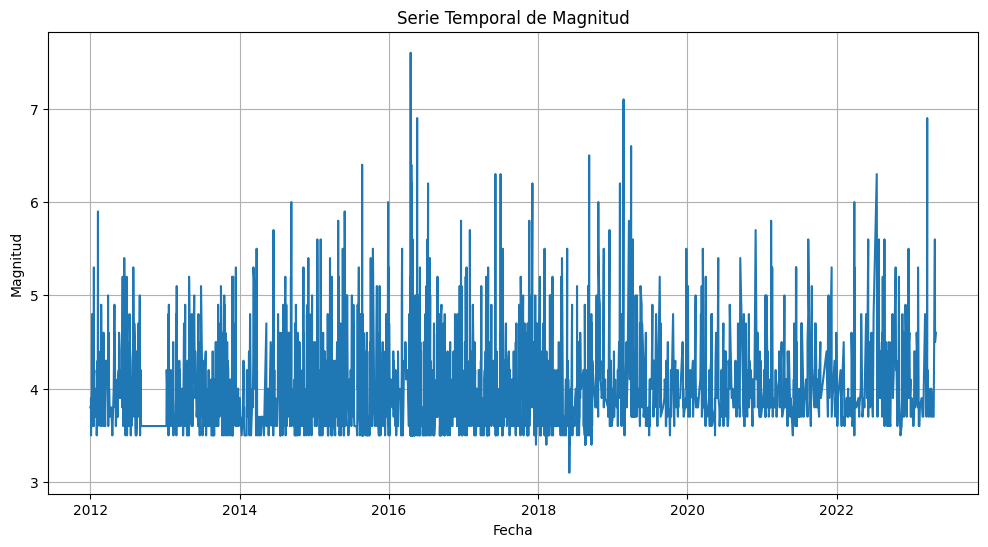

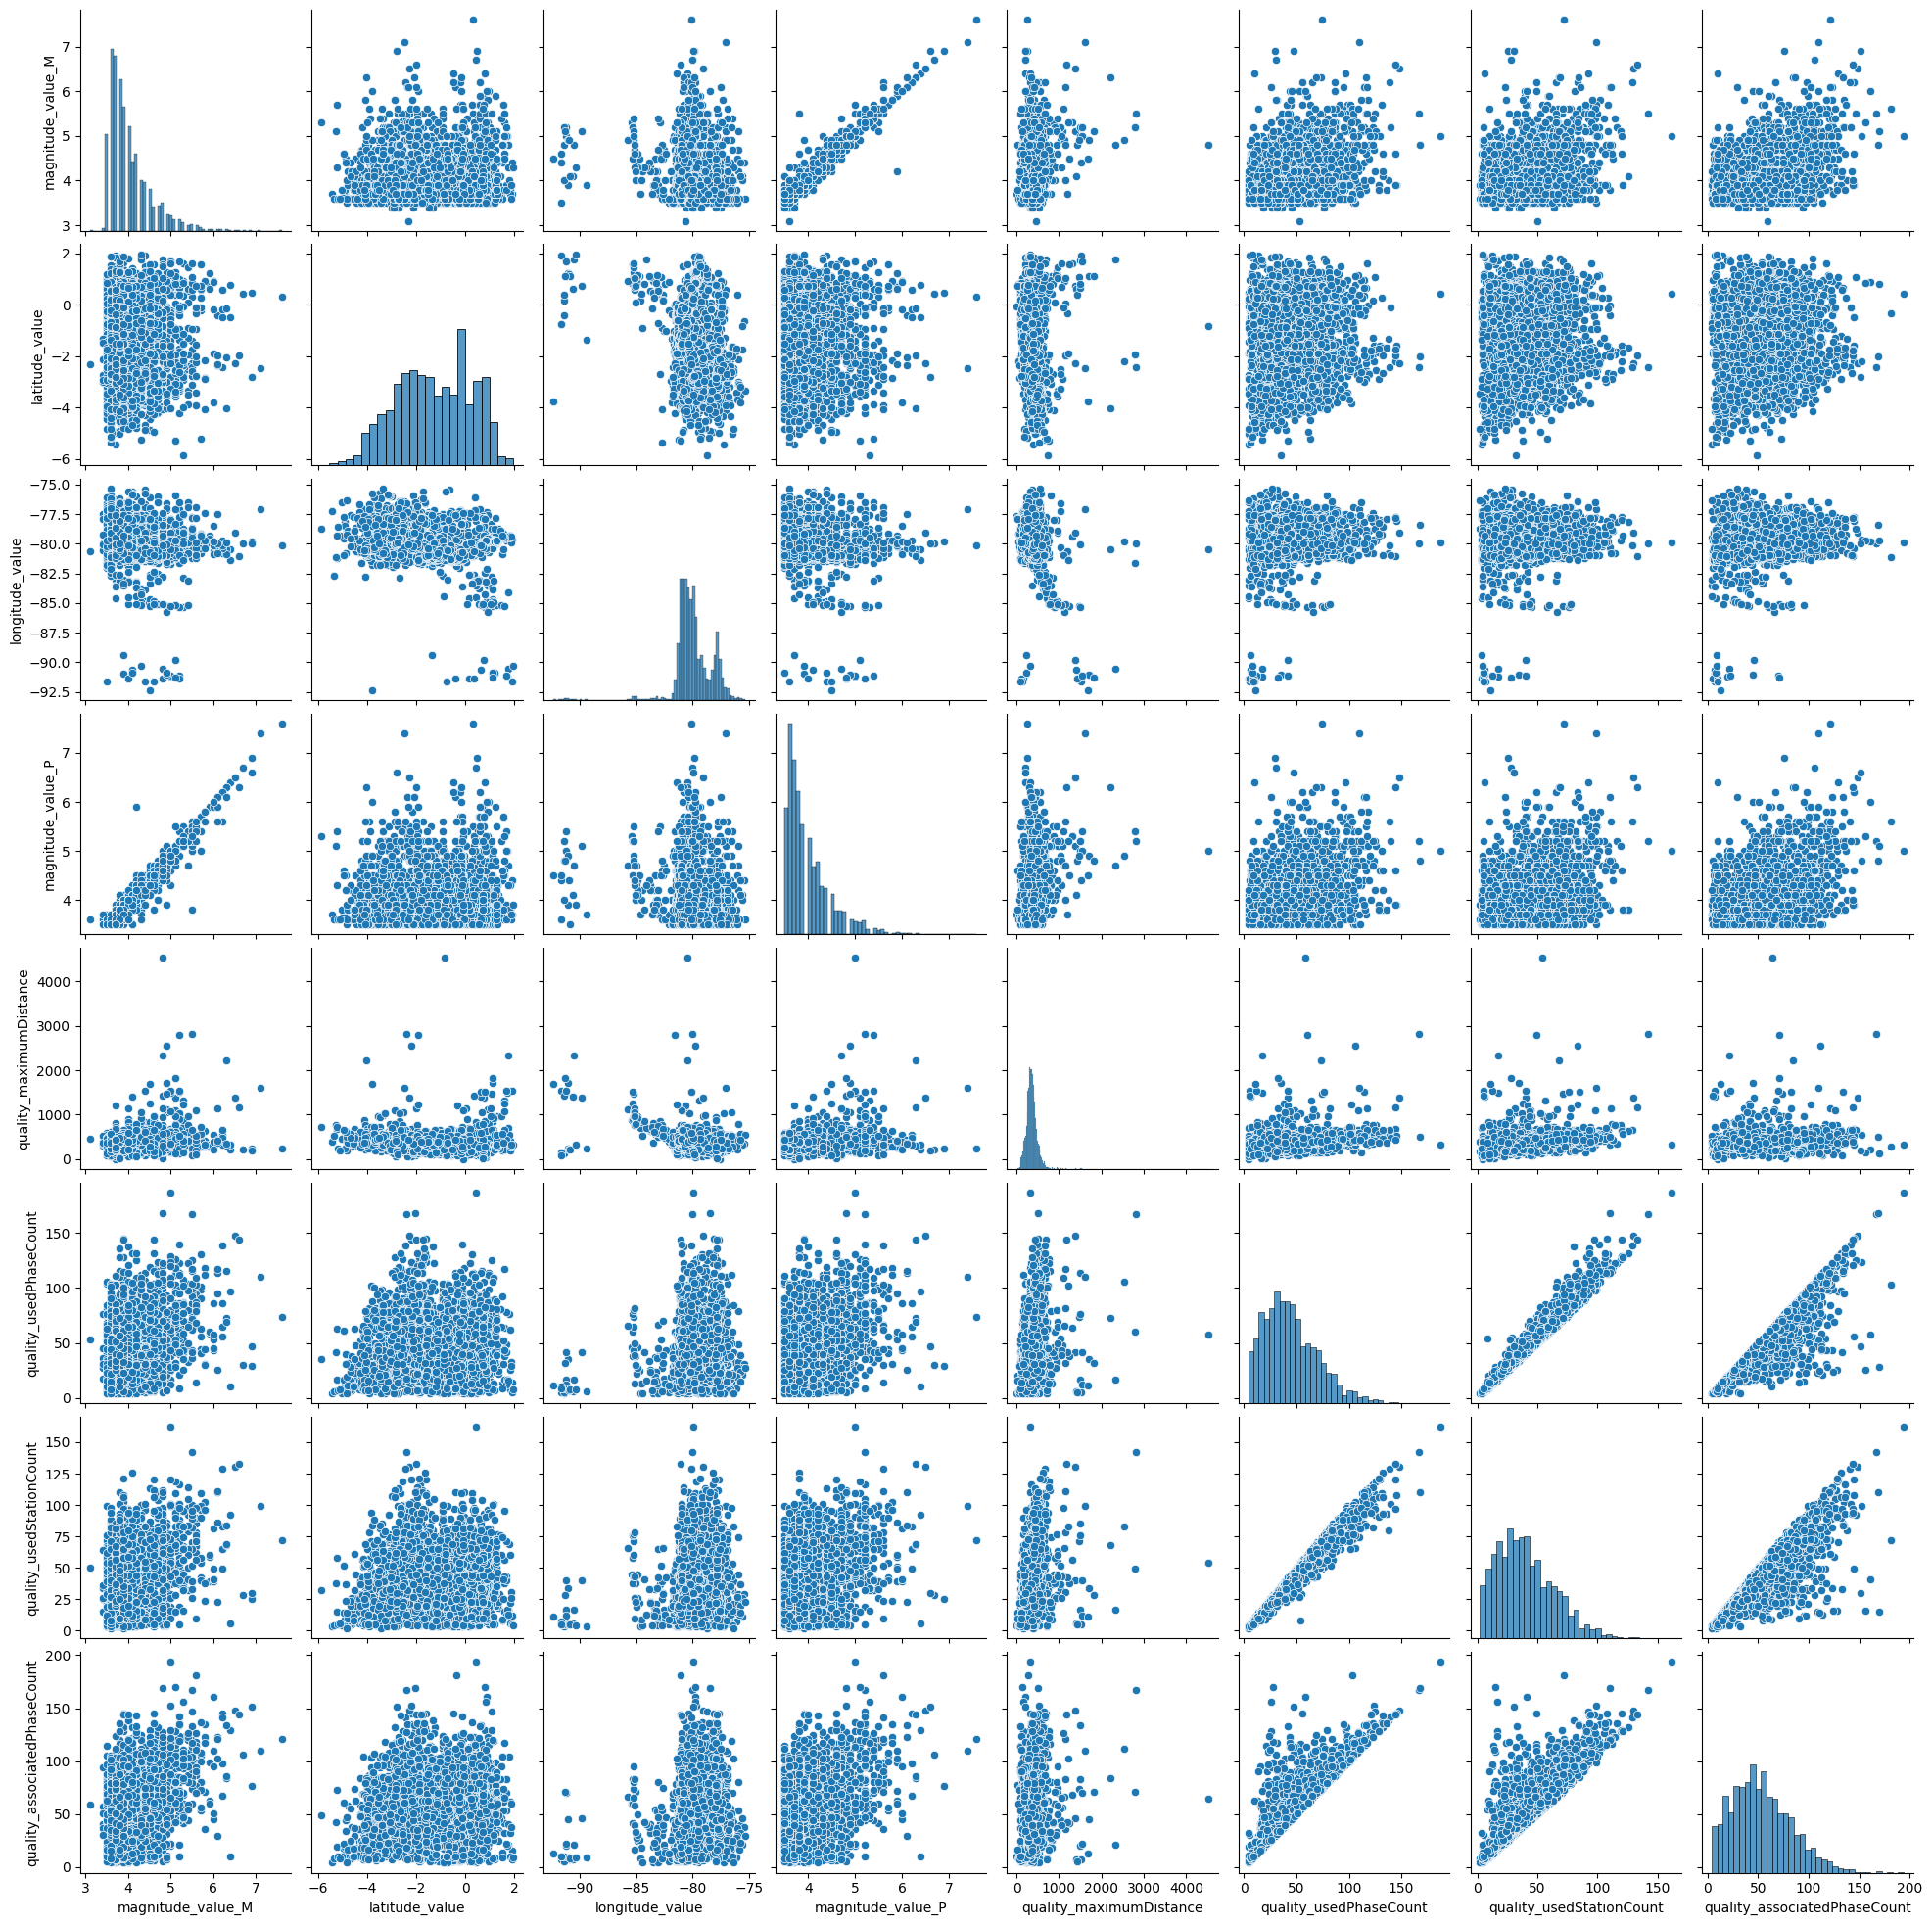

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la serie temporal de magnitud (por ejemplo)
plt.figure(figsize=(12, 6))
plt.plot(df_features['magnitude_value_M'])
plt.title('Serie Temporal de Magnitud')
plt.xlabel('Fecha')
plt.ylabel('Magnitud')
plt.grid(True)
plt.show()

# Explorar las características
sns.pairplot(df_features)
plt.show()


In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

# Supongamos que tienes una serie temporal llamada 'serie_temporal' con índice 'time_value'
# Asegúrate de que 'time_value' sea de tipo datetime y establece como índice si no lo está

# Dividir los datos en entrenamiento y prueba
train_data, test_data = train_test_split(df_features, train_size=0.8)

# Seleccionar la variable de respuesta 'magnitude_value_M' como y
y_train = train_data['magnitude_value_M']
y_test = test_data['magnitude_value_M']

# Usar auto_arima para determinar los órdenes óptimos
model = pm.auto_arima(y_train, seasonal=True, m=12,  # m es el período estacional, ajusta según tu serie
                      stepwise=True, trace=True)  # stepwise busca de manera eficiente

# Mostrar los órdenes determinados por auto_arima
print("Órdenes óptimos:", model.order, model.seasonal_order)

# Ajustar el modelo SARIMA con los órdenes encontrados
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(y_train, order=model.order, seasonal_order=model.seasonal_order)
results = sarima_model.fit()

# Realizar predicciones en el conjunto de prueba
predictions = results.get_forecast(steps=len(test_data))
predicted_values = predictions.predicted_mean

# Calcular el MSE y R² en los datos de prueba
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predicted_values)
r2 = r2_score(y_test, predicted_values)

print("MSE:", mse)
print("R²:", r2)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=9.04 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=3644.221, Time=0.34 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=3622.018, Time=4.66 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=3625.516, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=13451.197, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=3621.649, Time=0.18 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=3622.073, Time=2.21 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=4.83 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=3606.022, Time=0.25 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=3606.895, Time=4.58 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=3606.933, Time=4.36 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=6.22 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=3607.962, Time=0.41 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=3607.963, Time=1.66 sec
 ARIMA(1,0,1)(0,0,0)[12] intercep

C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\david\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


# Bayesian Ridge

In [ ]:

# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=42)
Y_train = np.ravel(Y_train)
# Crea un modelo de regresión lineal
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train, Y_train)

# Realiza predicciones en tus datos de prueba
Y_pred = bayesian_ridge_model.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)


MSE: 0.011023001100570874
RMSE: 0.10499048099980719
R2 Score: 0.9526953019732799


In [ ]:
# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_la, Y_la, test_size=0.2, random_state=42)
Y_train = np.ravel(Y_train)
# Crea un modelo de regresión lineal
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train, Y_train)

# Realiza predicciones en tus datos de prueba
Y_pred = bayesian_ridge_model.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 2.1915190814522045
RMSE: 1.480378019781503
R2 Score: 0.06217270566470445


In [ ]:
# Divide tus datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_lo, Y_lo, test_size=0.2, random_state=42)
Y_train = np.ravel(Y_train)
# Crea un modelo de regresión lineal
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train, Y_train)

# Realiza predicciones en tus datos de prueba
Y_pred = bayesian_ridge_model.predict(X_test)

# Ahora tienes las predicciones de latitud y longitud en Y_pred
Y_test = Y_test.to_numpy()

# Después de realizar las predicciones en el conjunto de prueba
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(Y_test, Y_pred)
print("MSE:", mse)

# Calcular el RMSE
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# Calcular el R2 Score
r2 = r2_score(Y_test, Y_pred)
print("R2 Score:", r2)

MSE: 1.5751760554971064
RMSE: 1.2550601800300678
R2 Score: 0.3905288121487832


# Evaluación de rendimiento

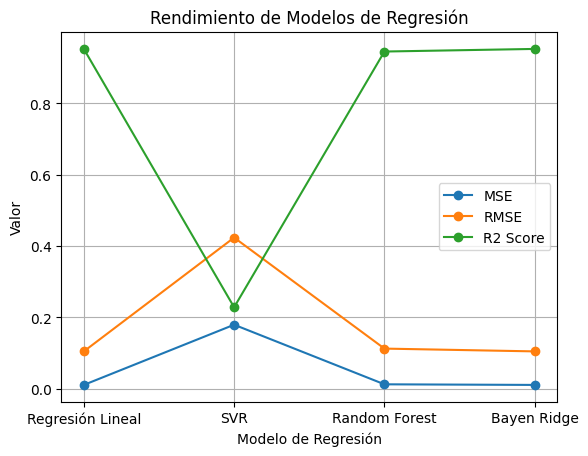

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=42)

# Crea modelos de regresión
models = {
    'Regresión Lineal': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Bayen Ridge': BayesianRidge()
}

# Entrena y evalúa cada modelo
results = {}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

# Extraer las métricas de rendimiento para cada modelo
metricas = ['MSE', 'RMSE', 'R2 Score']
valores_metricas = {metrica: [results[model_name][metrica] for model_name in models.keys()] for metrica in metricas}

# Crear un gráfico de línea para cada métrica
for metrica, valores in valores_metricas.items():
    plt.plot(models.keys(), valores, marker='o', label=metrica)

# Configurar etiquetas y leyendas
plt.xlabel('Modelo de Regresión')
plt.ylabel('Valor')
plt.title('Rendimiento de Modelos de Regresión')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


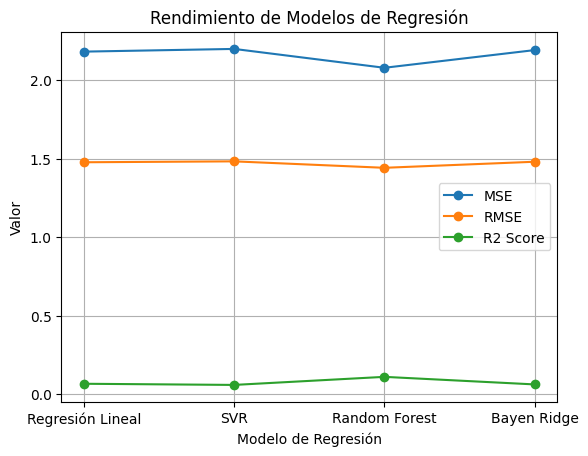

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_la, Y_la, test_size=0.2, random_state=42)

# Crea modelos de regresión
models = {
    'Regresión Lineal': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Bayen Ridge': BayesianRidge()
}

# Entrena y evalúa cada modelo
results = {}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

# Extraer las métricas de rendimiento para cada modelo
metricas = ['MSE', 'RMSE', 'R2 Score']
valores_metricas = {metrica: [results[model_name][metrica] for model_name in models.keys()] for metrica in metricas}

# Crear un gráfico de línea para cada métrica
for metrica, valores in valores_metricas.items():
    plt.plot(models.keys(), valores, marker='o', label=metrica)

# Configurar etiquetas y leyendas
plt.xlabel('Modelo de Regresión')
plt.ylabel('Valor')
plt.title('Rendimiento de Modelos de Regresión')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


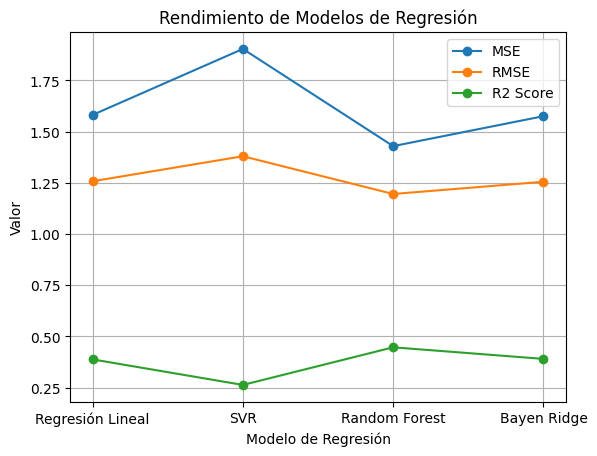

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_lo, Y_lo, test_size=0.2, random_state=42)

# Crea modelos de regresión
models = {
    'Regresión Lineal': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Bayen Ridge': BayesianRidge()
}

# Entrena y evalúa cada modelo
results = {}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

# Extraer las métricas de rendimiento para cada modelo
metricas = ['MSE', 'RMSE', 'R2 Score']
valores_metricas = {metrica: [results[model_name][metrica] for model_name in models.keys()] for metrica in metricas}

# Crear un gráfico de línea para cada métrica
for metrica, valores in valores_metricas.items():
    plt.plot(models.keys(), valores, marker='o', label=metrica)

# Configurar etiquetas y leyendas
plt.xlabel('Modelo de Regresión')
plt.ylabel('Valor')
plt.title('Rendimiento de Modelos de Regresión')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


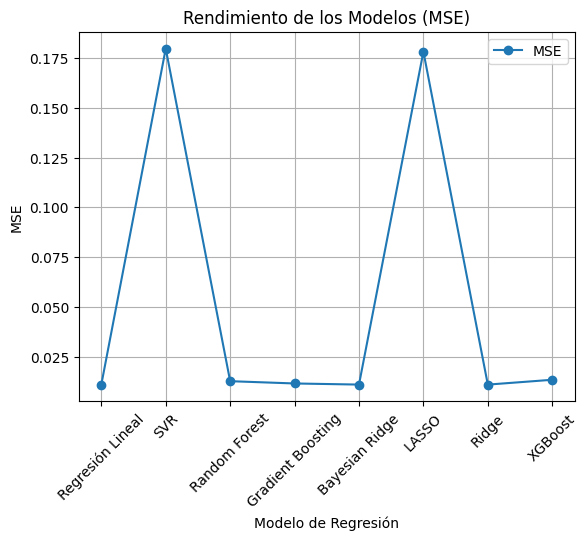

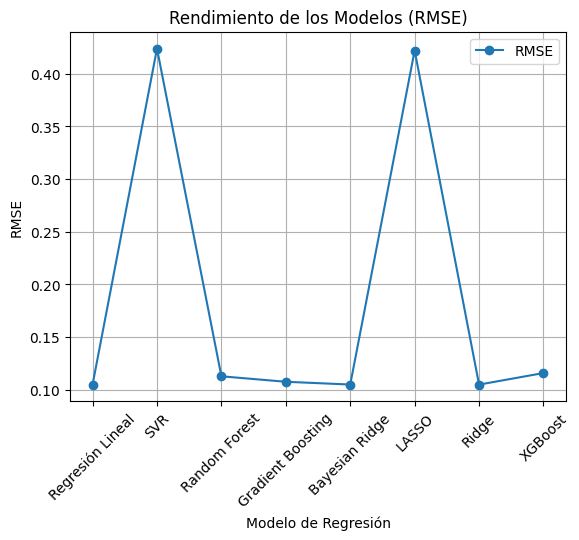

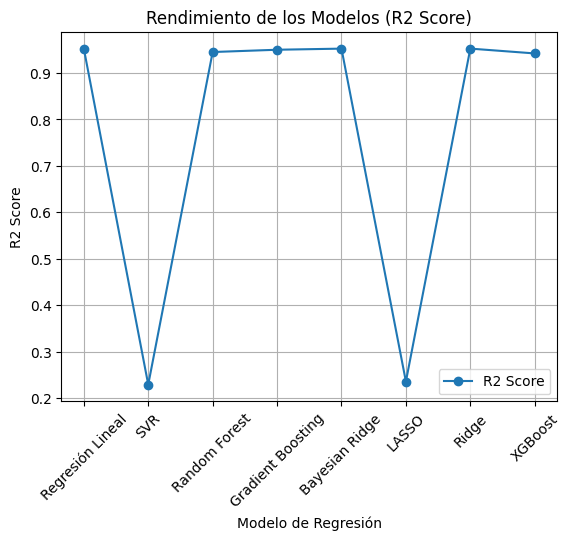

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=42)

# Define modelos
models = {
    'Regresión Lineal': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'LASSO': Lasso(),
    'Ridge': Ridge(),
    'XGBoost': XGBRegressor()  # Agrega el modelo XGBoost
}

# Entrena y evalúa cada modelo
results = {}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

# Graficar el rendimiento de los modelos en un gráfico de línea
metricas = ['MSE', 'RMSE', 'R2 Score']
for metrica in metricas:
    valores_metrica = [results[model_name][metrica] for model_name in models.keys()]
    plt.plot(models.keys(), valores_metrica, marker='o', label=metrica)
    plt.xlabel('Modelo de Regresión')
    plt.ylabel(metrica)
    plt.title(f'Rendimiento de los Modelos ({metrica})')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()



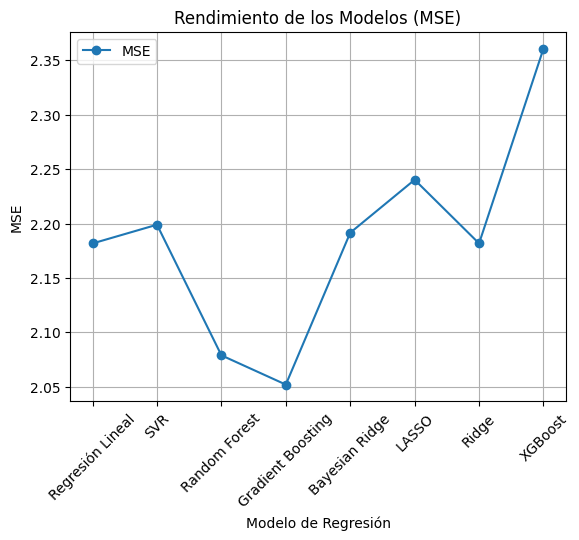

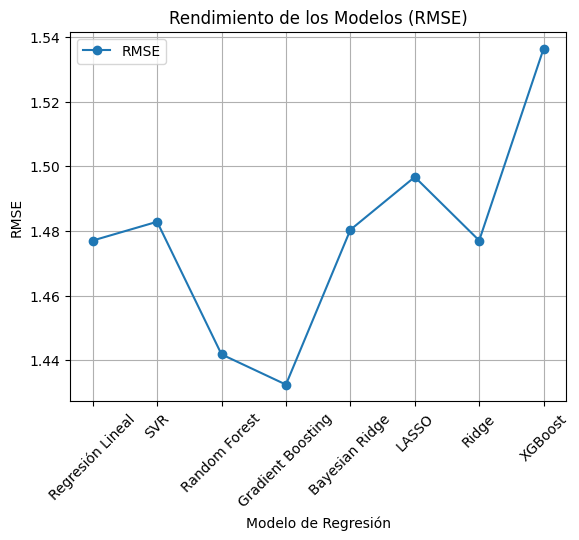

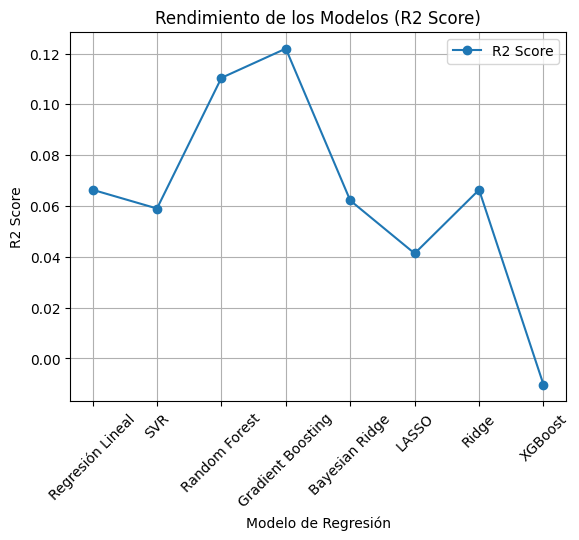

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_la, Y_la, test_size=0.2, random_state=42)

# Define modelos
models = {
    'Regresión Lineal': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'LASSO': Lasso(),
    'Ridge': Ridge(),
    'XGBoost': XGBRegressor()  # Agrega el modelo XGBoost
}

# Entrena y evalúa cada modelo
results = {}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

# Graficar el rendimiento de los modelos en un gráfico de línea
metricas = ['MSE', 'RMSE', 'R2 Score']
for metrica in metricas:
    valores_metrica = [results[model_name][metrica] for model_name in models.keys()]
    plt.plot(models.keys(), valores_metrica, marker='o', label=metrica)
    plt.xlabel('Modelo de Regresión')
    plt.ylabel(metrica)
    plt.title(f'Rendimiento de los Modelos ({metrica})')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

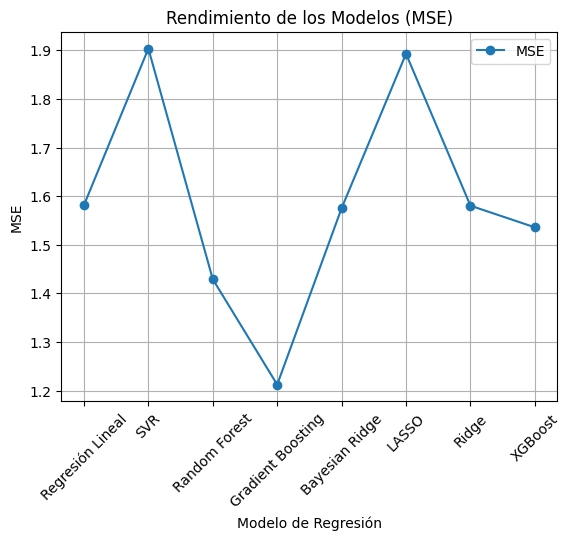

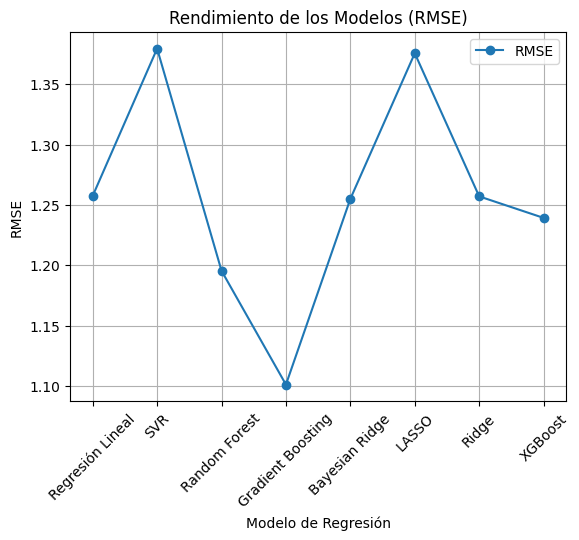

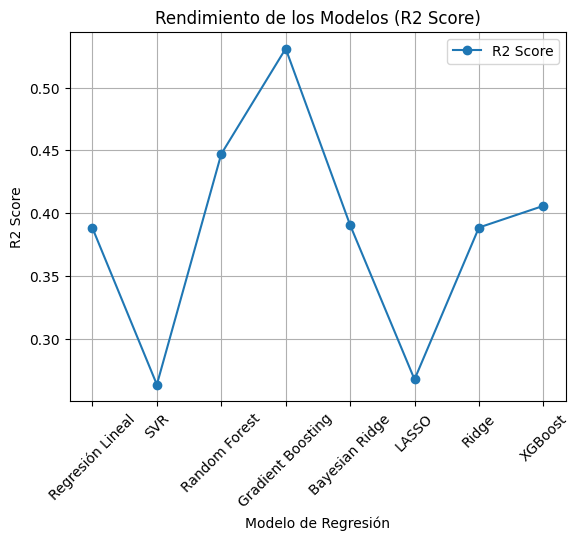

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_lo,Y_lo, test_size=0.2, random_state=42)

# Define modelos
models = {
    'Regresión Lineal': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'LASSO': Lasso(),
    'Ridge': Ridge(),
    'XGBoost': XGBRegressor()  # Agrega el modelo XGBoost
}

# Entrena y evalúa cada modelo
results = {}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, Y_pred)
    results[model_name] = {'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}

# Graficar el rendimiento de los modelos en un gráfico de línea
metricas = ['MSE', 'RMSE', 'R2 Score']
for metrica in metricas:
    valores_metrica = [results[model_name][metrica] for model_name in models.keys()]
    plt.plot(models.keys(), valores_metrica, marker='o', label=metrica)
    plt.xlabel('Modelo de Regresión')
    plt.ylabel(metrica)
    plt.title(f'Rendimiento de los Modelos ({metrica})')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

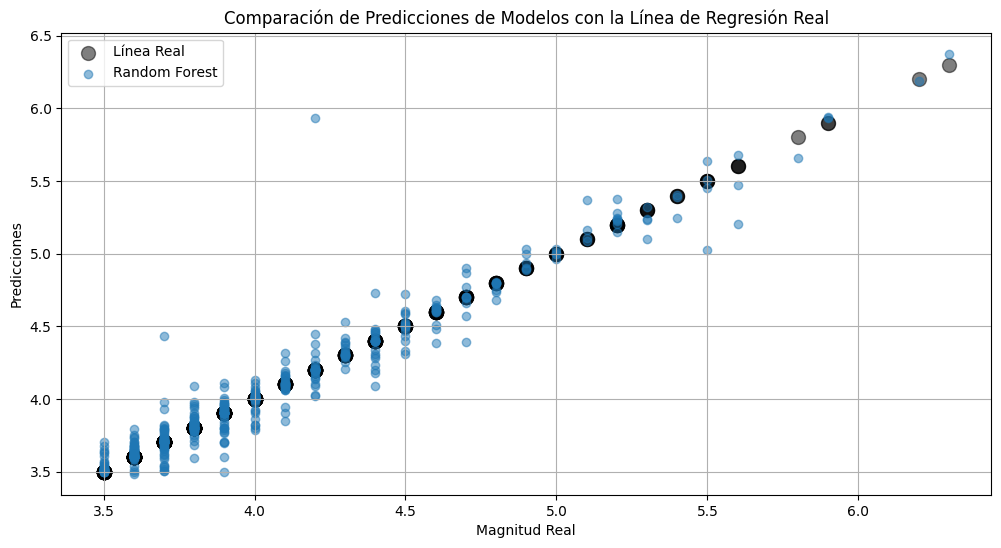

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import numpy as np

# Divide tus datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_m, Y_m, test_size=0.2, random_state=42)

# Define modelos
models = {
    'Bayesian Ridge': BayesianRidge(),

}

# Entrena y evalúa cada modelo y almacena las predicciones
model_predictions = {}

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    model_predictions[model_name] = Y_pred

# Graficar los datos de prueba y las predicciones de los modelos
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_test, label='Línea Real', c='black', s=100, alpha=0.5)

for model_name, predictions in model_predictions.items():
    plt.scatter(Y_test, predictions, label=model_name, alpha=0.5)

plt.xlabel('Magnitud Real')
plt.ylabel('Predicciones')
plt.title('Comparación de Predicciones de Modelos con la Línea de Regresión Real')
plt.legend()
plt.grid(True)
plt.show()


# Resultados

In [ ]:
# Crea un DataFrame con las predicciones, las magnitudes y las coordenadas reales
predictions_df


,Pred_mag,Real_mag
0,3.706124,3.6
1,4.402072,4.4
2,4.000758,4.0
3,3.700504,3.7
4,3.624066,3.6
...,...,...
592,4.930253,4.9
593,3.607083,3.6
594,4.898726,4.9
595,3.604053,3.6


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Asegúrate de que Y_pred y Y_test sean vectores unidimensionales
Y_pred = np.reshape(Y_pred, (-1,))
Y_test = np.reshape(Y_test, (-1,))

# Crea un DataFrame con las predicciones, las magnitudes y las coordenadas reales
predictions_df = pd.DataFrame({'Pred_mag': Y_pred,
                               'Real_mag': Y_test
                              })

In [ ]:
predictions_df

,Pred_lo,Real_lo
0,-81.587268,-82.146408
1,-80.205230,-80.207703
2,-79.736656,-80.223404
3,-79.259039,-77.920586
4,-79.755425,-79.422974
...,...,...
592,-80.547538,-80.500282
593,-80.646810,-80.361084
594,-80.256224,-80.325661
595,-80.078510,-80.552727
